In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
import numpy as np
from matplotlib import pyplot as plt
import os

map: 197MHz.gdf
Original On-crest phase: 2.4173386748607264  Energy Gain: 506528.6196646987
Scaled On-crest phase: 2.417338674860726  Energy Gain: 1.0000000000000002


map: 591MHz.gdf
Original On-crest phase: 356.2205241959671  Energy Gain: 85115.03727886154
Scaled On-crest phase: 356.2205241959671  Energy Gain: 1.0




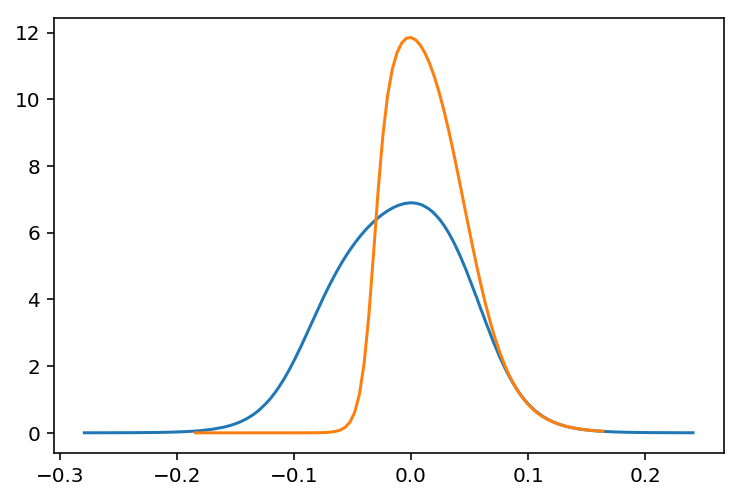

In [2]:
files = ['197MHz.txt', '591MHz.txt', 'B_FIELD.txt']

column_indices = {
    '197MHz.txt':{'z':0, 'Fz':2},
    '591MHz.txt':{'z':0, 'Fz':1},
    'B_FIELD.txt':{'z':0, 'Fz':2}
}

column_scales = {
    '197MHz.txt': {'z':1e-2, 'Fz':1e6},
    '591MHz.txt': {'z':1e-2, 'Fz':1e6},
    'B_FIELD.txt':{'z':1e-2, 'Fz':1e2}
}

column_names = {
    '197MHz.txt': {'z':'z', 'Fz':'Ez'},
    '591MHz.txt': {'z':'z', 'Fz':'Ez'},
    'B_FIELD.txt':{'z':'z', 'Fz':'Bz'}
}

# Handle the cavity maps
z_map = []

from gpt.field_map import Map1D_TM
from gpt.field_map import energy_gain

for ii,file in enumerate(files[:-1]):
    
    data = np.loadtxt(file,skiprows=1)
    z = data[:,column_indices[file]['z']]*column_scales[file]['z']
    f = data[:,column_indices[file]['Fz']]*column_scales[file]['Fz']
    
    max_index = np.argwhere(f==max(f))[0][0]
    zmax = z[max_index] 
    z_map.append(zmax)

    fdat = np.zeros( (len(z), 2) )
    fdat[:,0]=z-zmax
    fdat[:,1]=f
    
    header = 'z    Ez'
    np.savetxt('tmp.txt', fdat, header=header, footer='', comments=' ')
    gdffile = file.replace('.txt', '.gdf')
    os.system(f'$ASCI2GDF_BIN -o {gdffile} tmp.txt')
    os.system('rm tmp.txt')

    print('map:', gdffile)
    cav = Map1D_TM(gdffile, frequency=197e6, column_names={'z':'z', 'Ez':'Ez'})
    print('Original On-crest phase:',cav.oncrest_phase, ' Energy Gain:', cav.energy_gain(cav.oncrest_phase))
    
    cav.scale_fields(1/cav.energy_gain(cav.oncrest_phase))
    print('Scaled On-crest phase:',cav.oncrest_phase, ' Energy Gain:', cav.energy_gain(cav.oncrest_phase))
    
    cav.write_gdf(gdffile)
    plt.plot(cav['z'], cav['Ez'])
    print('\n')


# 197 MHz Cavity
---

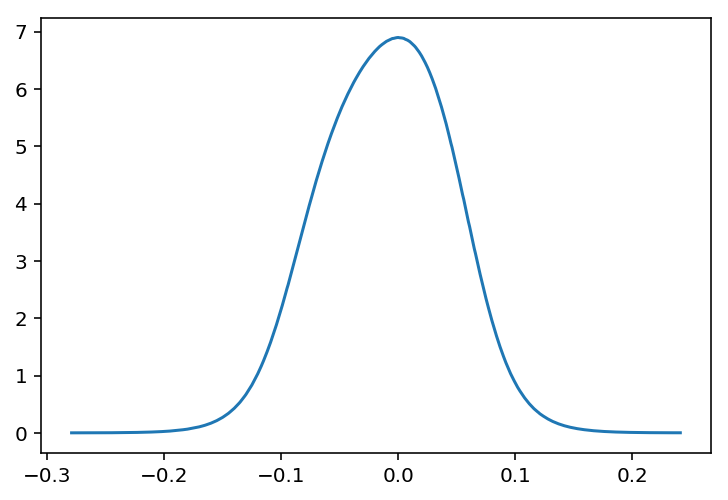

In [3]:
qwc0 = Map1D_TM('197MHz.gdf', frequency=197e6, column_names={'z':'z', 'Ez':'Ez'})
plt.plot(qwc0['z'], qwc0['Ez']);

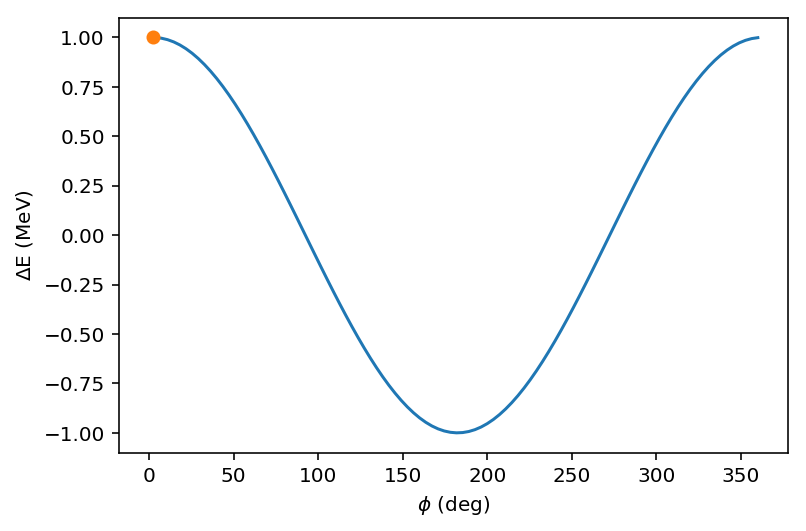

In [4]:
phis = np.linspace(0,360,100)
plt.plot(phis, qwc0.energy_gain(phis), qwc0.oncrest_phase, qwc0.energy_gain(qwc0.oncrest_phase), 'o');
plt.xlabel('$\phi$ (deg)');
plt.ylabel('$\Delta$E (MeV)');

In [17]:
clines = qwc0.gpt_lines('CAV01', 
                        '197MHz.gdf', 
                        scale=2, 
                        oncrest_phase=120, 
                        relative_phase=140,
                        user_vars=[], auto_phase_index=0)
for cline in clines:
    print(cline)

CAV01_scale = 2;
CAV01_oncrest_phase = 120;
CAV01_relative_phase = 140;
CAV01_phase = (CAV01_oncrest_phase + CAV01_relative_phase)*pi/180;
CAV01_gamma = 1;
phasing_amplitude_0 = CAV01_scale;
phasing_on_crest_0  = CAV01_oncrest_phase;
phasing_relative_0  = CAV01_relative_phase;
phasing_gamma_0 = CAV01_gamma;
Map1D_TM("wcs", 0, 0, 0, 1, 0, 0, 0, 1, 0, "197MHz.gdf", "z", "Ez", CAV01_scale, CAV01_phase, 1237787505.5143785);


# 591 MHz Cavity
---

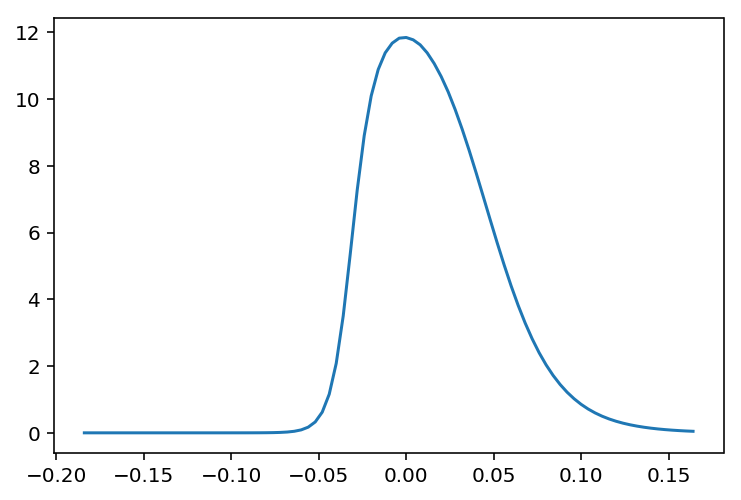

In [6]:
qwc3 = Map1D_TM('591MHz.gdf', frequency=591e6, column_names={'z':'z', 'Ez':'Ez'})
plt.plot(qwc3['z'], qwc3['Ez']);

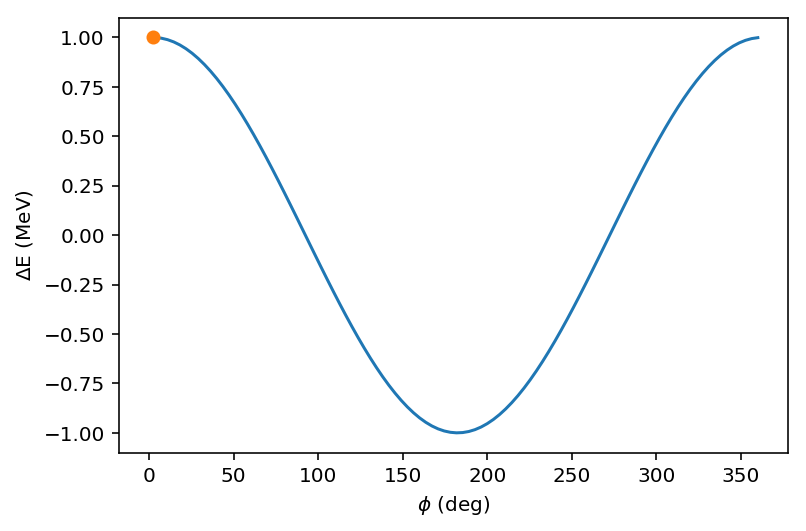

In [7]:
phis = np.linspace(0,360,100)
plt.plot(phis, qwc0.energy_gain(phis), qwc0.oncrest_phase, qwc0.energy_gain(qwc0.oncrest_phase), 'o');
plt.xlabel('$\phi$ (deg)');
plt.ylabel('$\Delta$E (MeV)');

In [8]:
from gpt.field_map import Map1D_B
from gpt.field_map import Map2D_B

# B_FILED:
file='B_FIELD.txt'
data = np.loadtxt(file,skiprows=1)
z = data[:,column_indices[file]['z']]*column_scales[file]['z']
f = data[:,column_indices[file]['Fz']]*column_scales[file]['Fz']
    
max_index = np.argwhere(f==max(f))[0][0]
zmax = z[max_index] 

z_map.append(zmax)

z = z[:2*max_index+1]
f = f[:2*max_index+1]

fdat = np.zeros( (len(z), 2) )
fdat[:,0]=z-zmax
fdat[:,1]=f/max(f)/100
    
header = 'z    Bz'
np.savetxt('tmp.txt', fdat, header=header, footer='', comments=' ')
gdffile = file.replace('.txt', '.gdf')
os.system(f'$ASCI2GDF_BIN -o {gdffile} tmp.txt')
os.system('rm tmp.txt')

sol = Map1D_B(gdffile, column_names={'z':'z', 'Bz':'Bz'})


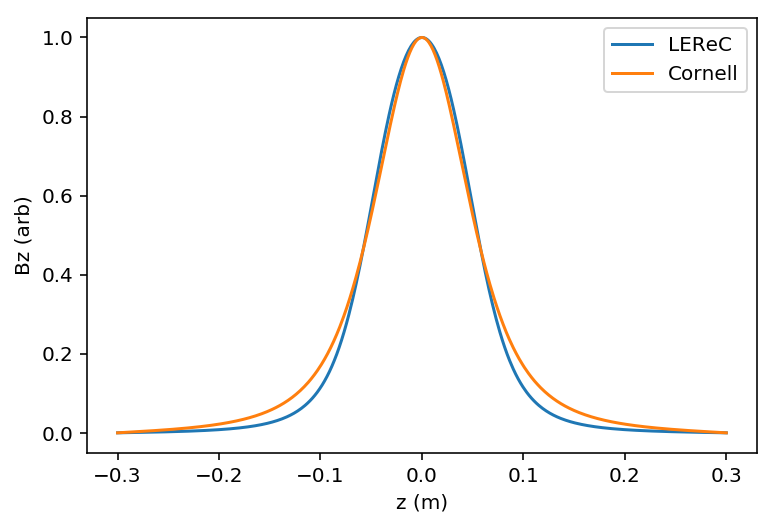

In [9]:
gdf_file = '/Users/colwyngulliford/Documents/GitHub/lume-gpt/templates/dcgun/fields/solenoid_SLA_L60.gdf'
column_names = {'R':'r', 'Z':'z', 'Br':'Br', 'Bz':'Bz', '|B|':'|B|', 'A':'A'}
cusol = Map2D_B(gdf_file, column_names=column_names)

plt.plot(sol['z'], sol['Bz']/max(sol['Bz']), cusol['Z'], cusol.on_axis_Bz/max(cusol.on_axis_Bz));
plt.xlabel('z (m)');
plt.ylabel('Bz (arb)');
plt.legend(['LEReC', 'Cornell']);

In [16]:
sol1_lines = sol.gpt_lines('SOL01', scale=2, user_vars=['x','y','scale'])

for line in sol1_lines:
    print(line)
    

SOL01_x = 0;
SOL01_y = 0;
SOL01_scale = 2;
Map1D_B("wcs", SOL01_x, SOL01_y, 0, 1, 0, 0, 0, 1, 0, "B_FIELD.gdf", "z", "Bz", SOL01_scale);


In [11]:
sol2_lines = cusol.gpt_lines('SOL02', 'B_FIELD.gdf', scale=2, user_vars=['x','y','scale'])

for line in sol2_lines:
    print(line)

SOL02 B_FIELD.gdf wcs [0, 0, 0] [1, 0, 0] [0, 1, 0] 2 ['x', 'y', 'scale']
SOL02_x = 0;
SOL02_y = 0;
SOL02_scale = 2;
Map2D_B("wcs", SOL02_x, SOL02_y, 0, 1, 0, 0, 0, 1, 0, "Z", "Bz", "R", "Br", SOL02_scale);
